# Today we're going to be diving deep into a dataset all about LEGO, which will help us answer a whole bunch of interesting questions about the history of the company, their product offering, and which LEGO set rules them all:

## What is the most enormous LEGO set ever created and how many parts did it have?

### In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

### Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?

### When did the LEGO company really take-off based on its product offering? How many themes and sets did it release every year?

### Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?

<img src="https://i.imgur.com/49FNOHj.jpg">

### Exploring the LEGO Brick Colours

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
colors=pd.read_csv('Day74/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [65]:
colors['name'].nunique()

135

In [66]:
# how many are transparent?
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [67]:
# another approach
colors.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

## Exploring the sets.csv

### The sets.csv contains a list of LEGO sets. It shows in which year the set was released and the number of parts in the set.

### Can you take the first steps in exploring this dataset? Read the .csv and take a look at the columns.

### Then try and answer the following questions:
##### 1. In which year were the first LEGO sets released and what were these sets called?

##### 2. How many different products did the LEGO company sell in their first year of operation?

##### 3. What are the top 5 LEGO sets with the most number of parts?

In [68]:
# What is the most enormous LEGO set ever created
# and how many parts did it have?

sets=pd.read_csv('Day74/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [69]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [70]:
# First LEGO set released and its product names
sets.sort_values('year', ascending=True).head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


In [71]:
# How many different products sold in the first year since launch
sets.loc[sets['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [72]:
# or using .query()
sets.query("year == 1949")

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [73]:
# What are the top 5 LEGO sets with the most number of parts? 
sets.sort_values('num_parts', ascending=False).head()


,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


### Now let's take a look at how many sets the LEGO company has published year-on-year. This might tell us something about how LEGO's product offering has changed over time.

In [74]:
# check number of sets released by year
sets_by_year=sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [75]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

## From this, we can see that LEGO published less than 10 different sets per year during its first few years of operation. But by 2019 the company had grown spectacularly, releasing 840 sets in that year alone!

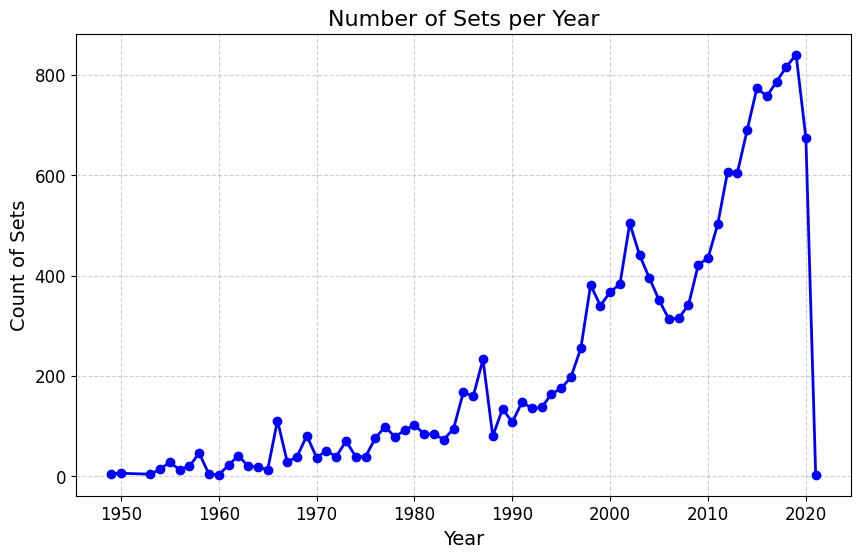

In [76]:
# Plot using Matplotlib
# Create a line plot
plt.figure(figsize=(10,6))
plt.plot(sets_by_year.index, sets_by_year.set_num, marker='o', linestyle='-', color='b', linewidth=2) 

# Add lables and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Sets', fontsize=14)
plt.title('Number of Sets per Year', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

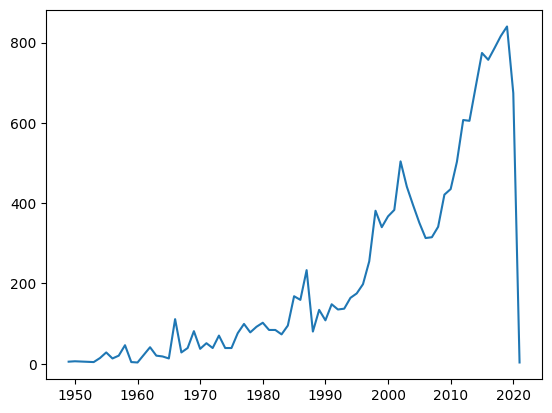

In [77]:
# or run below
plt.plot(sets_by_year.index, sets_by_year.set_num)

### Because the .csv file is from late 2020, to plot the full calendar years, you will have to exclude some data from your chart. Use the slicing techniques to avoid plotting the last two years.

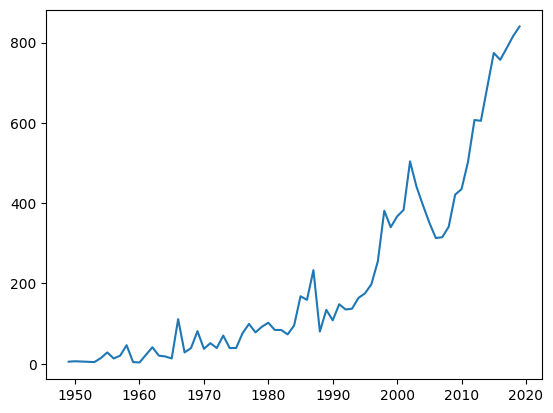

In [78]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

In [96]:
sets_by_year.head(10)

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
1956,13,13,13,13
1957,20,20,20,20
1958,46,46,46,46
1959,4,4,4,4


In [80]:
print(sets_by_year.columns)

Index(['set_num', 'name', 'theme_id', 'num_parts'], dtype='object')


In [81]:
print(sets_by_year.index)

Index([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='int64', name='year')


In [82]:
# To display all rows
pd.set_option('display.max_rows', None)
sets_by_year[['set_num']]

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28
1956,13
1957,20
1958,46
1959,4


## We also see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.

### Number of Themes per Calendar Year

In [100]:
# head() 
sets.groupby(['year','theme_id']).size().reset_index().sort_values(by='year', ascending=True).head(10)

,year,theme_id,0
0,1949,365,3
1,1949,371,2
2,1950,371,6
4,1953,371,3
3,1953,366,1
6,1954,372,2
5,1954,371,12
7,1955,370,1
8,1955,371,20
9,1955,372,6


In [104]:
# tail()
sets.groupby(['year','theme_id']).size().reset_index().sort_values(by='year', ascending=True).tail(10)

,year,theme_id,0
2829,2020,230,2
2828,2020,229,3
2827,2020,228,1
2826,2020,227,5
2825,2020,216,1
2881,2020,696,3
2880,2020,695,3
2887,2020,709,4
2857,2020,602,9
2888,2021,689,3


#### We can accomplish this by chaining the .groupby() and the .agg() functions together:

In [101]:
# or head()
sets.groupby(['year', 'theme_id']).agg({'set_num': 'count'}).reset_index().sort_values(by='year', ascending=True).head(10)

,year,theme_id,set_num
0,1949,365,3
1,1949,371,2
2,1950,371,6
4,1953,371,3
3,1953,366,1
6,1954,372,2
5,1954,371,12
7,1955,370,1
8,1955,371,20
9,1955,372,6


In [105]:
# or tail()
sets.groupby(['year', 'theme_id']).agg({'set_num': 'count'}).reset_index().sort_values(by='year', ascending=True).tail(10)

,year,theme_id,set_num
2829,2020,230,2
2828,2020,229,3
2827,2020,228,1
2826,2020,227,5
2825,2020,216,1
2881,2020,696,3
2880,2020,695,3
2887,2020,709,4
2857,2020,602,9
2888,2021,689,3


### We want to calculate the number of different themes by calendar year. This means we have to group the data by year and then count the number of unique theme_ids for that year.

In [106]:
# take count of unique theme_id by year
themes_by_year=sets.groupby('year').agg({'theme_id':pd.Series.nunique})

In [110]:
themes_by_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)
themes_by_year.head(10)

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
1956,3
1957,4
1958,3
1959,3


In [109]:
themes_by_year.tail(10)

,nr_themes
year,
2012,84
2013,87
2014,94
2015,98
2016,92
2017,89
2018,93
2019,78
2020,82


### Here we can see that LEGO only had 2 themes during the first few years, but just like the number of sets the number of themes expanded manifold over the years. 

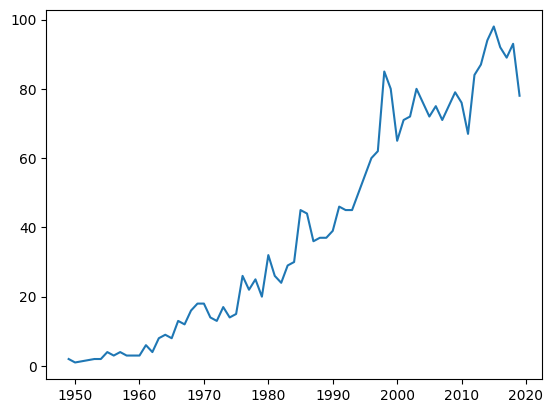

In [113]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

Text(0, 0.5, 'Number of Themes')

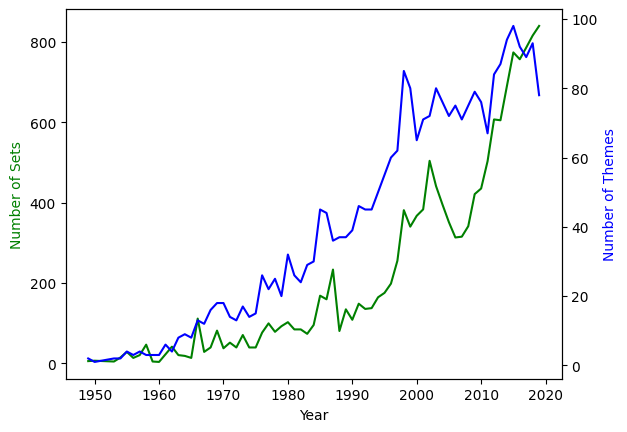

In [123]:
ax1=plt.gca() # get the axis
ax2=ax1.twinx() # create another axis that shares the same x-axis

# Add styling
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='green')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='blue')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes',color='blue')

### Complexity Over Time

#### Have LEGO sets become larger and more complex over time? Let's work out the average number of parts per LEGO set. This is the perfect time to revise how to use the .agg() function.

In [127]:
parts_per_set=sets.groupby('year')['num_parts'].mean()
parts_per_set.head(10)

year
1949     99.600000
1950      1.000000
1953     13.500000
1954     12.357143
1955     36.607143
1956     18.923077
1957     44.750000
1958     41.130435
1959     16.250000
1960    175.333333
Name: num_parts, dtype: float64

In [131]:
# or
parts_per_set = sets.groupby('year').agg({'num_parts': 'mean'}).reset_index()
parts_per_set.head(10)

,year,num_parts
0,1949,99.600000
1,1950,1.000000
2,1953,13.500000
3,1954,12.357143
4,1955,36.607143
5,1956,18.923077
6,1957,44.750000
7,1958,41.130435
8,1959,16.250000
9,1960,175.333333


In [132]:
parts_per_set.tail(10)

,year,num_parts
61,2012,154.153213
62,2013,180.031405
63,2014,179.911594
64,2015,191.379845
65,2016,209.920740
66,2017,221.840967
67,2018,213.618873
68,2019,207.510714
69,2020,259.732938
70,2021,0.000000


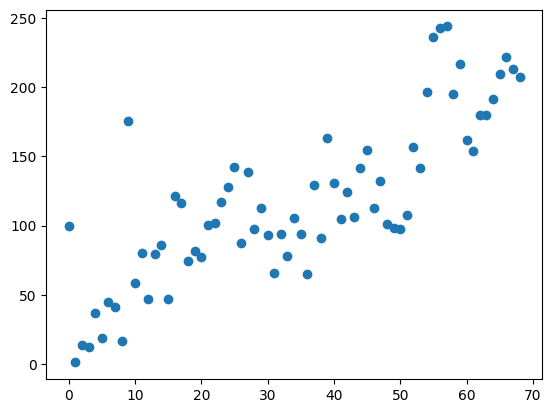

In [133]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

### From the chart, we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.

## LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? Is it one of LEGO's own themes like Ninjago or Technic or is it a third party theme? Let's analyse LEGO's product lines in more detail!

In [134]:
sets.head(10)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,1978,186,15
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3
9,003-1,Master Mechanic Set,1966,366,403


<img src="https://i.imgur.com/Sg4lcjx.png">

In [145]:
themes = pd.read_csv('Day74/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [147]:
themes[themes.name=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


### Why would Star Wars have so many different themes? We can check which products corresponded to those themes in the sets.csv:

In [149]:
sets[sets.theme_id==18].sort_values('year',ascending=True)

,set_num,name,year,theme_id,num_parts
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


### Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters. What about, say theme 209?

In [150]:
sets[sets.theme_id==209].sort_values('year',ascending=True)

,set_num,name,year,theme_id,num_parts
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312


### Here we see that all of the Star Wars Advent Calendars share the same theme_id. That makes sense.

## How to Merge DataFrames and Create Bar Charts

### Let's use the .merge() method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

In [154]:
set_theme_count = sets["theme_id"].value_counts().sort_values(ascending=False)
set_theme_count.head()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

### To make sure we have a column with the name id, I'll convert this Pandas Series into a Pandas DataFrame.

#### Here I'm providing a dictionary to create the DataFrame. The keys in the dictionary become my column names.

In [156]:
set_theme_count=pd.DataFrame({'id':set_theme_count.index,'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


## The Pandas .merge() function

### To .merge() two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set on='id'. Both our set_theme_count and our themes DataFrames have a column with this name.

In [159]:
merged_df=pd.merge(set_theme_count, themes, on='id')
merged_df.head(10)

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
5,505,328,Basic Set,504.0
6,497,310,Books,NaN
7,632,299,Town,504.0
8,371,273,Supplemental,365.0
9,516,248,Duplo and Explore,507.0


### Aha! Star Wars is indeed the theme with the most LEGO sets. Let's plot the top 10 themes on a chart.

<BarContainer object of 10 artists>

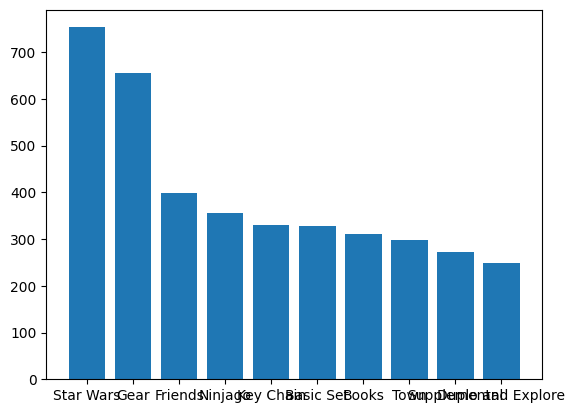

In [160]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

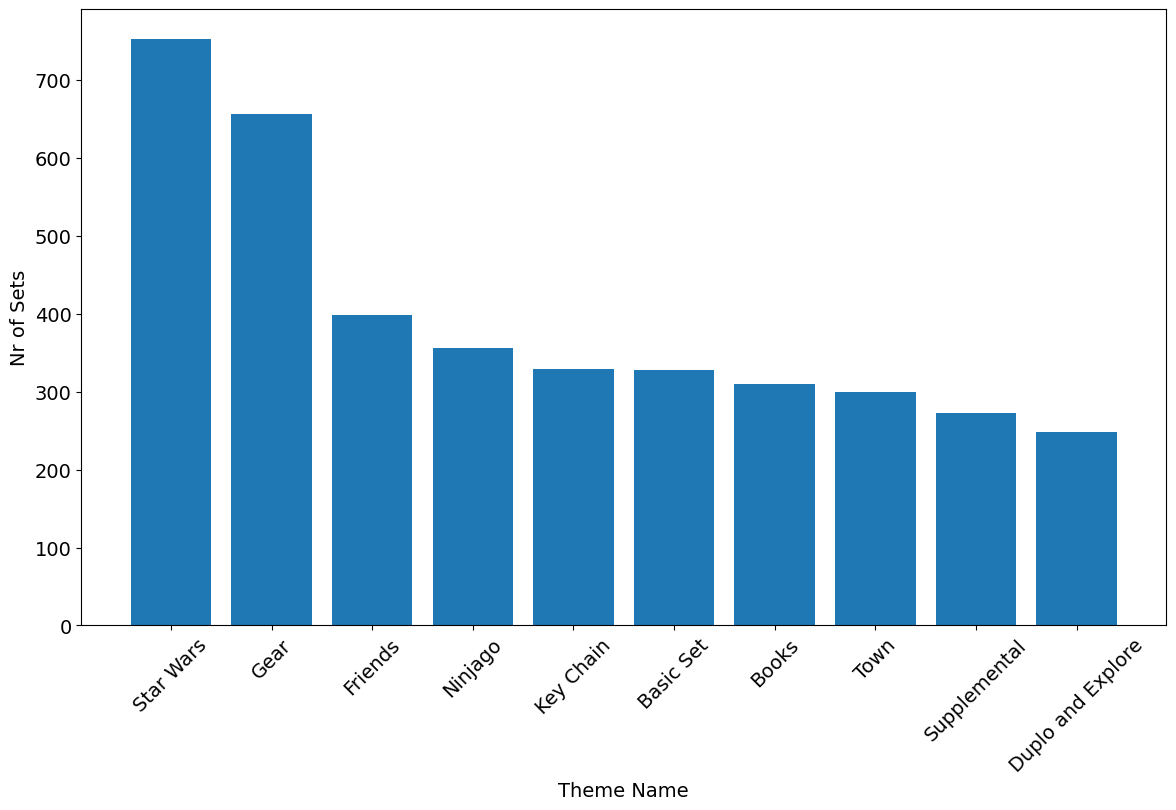

In [161]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

### Lego’s product lineup includes iconic themes like Star Wars, Town, and Ninjago, but surprisingly, a significant portion consists of books, keychains, and other merchandise. The 'Gear' category alone is massive, covering everything from bags to pencil cases. This raises an interesting question: has Lego strayed from its core business or successfully diversified? 